In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [1]:
!curl https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv -o FuelConsumptionCo2.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 72629  100 72629    0     0   102k      0 --:--:-- --:--:-- --:--:--  102k


In [3]:
df = pd.read_csv("FuelConsumptionCo2.csv")
#checking the dataframe
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
#seeing the first 9 rows
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


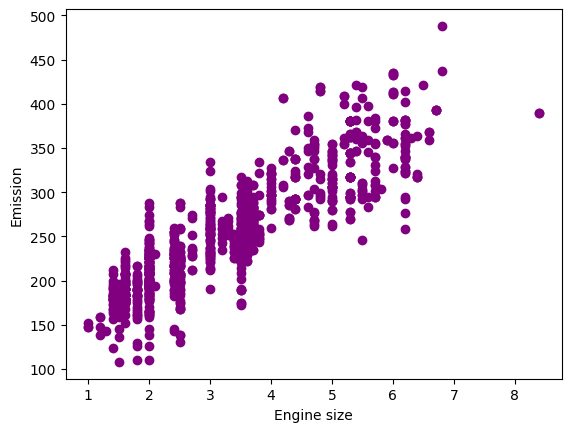

In [5]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = 'purple')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [6]:
#splitting our data into train and test samples
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

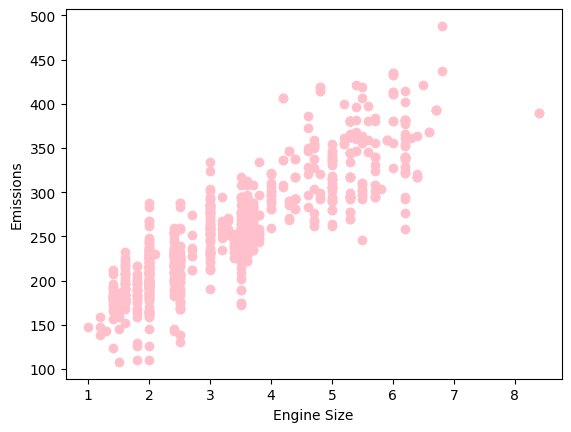

In [11]:
#Train data distribution
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='pink')
plt.xlabel("Engine Size")
plt.ylabel("Emissions")
plt.show()

In [12]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x,y)
print('Coefficient : ', regr.coef_) #default OLS

Coefficient :  [[10.69850001  7.56040555  9.62628576]]


In [14]:
#Prediction
y_hat = regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Mean Squared Error (MSE) : %.2f"%np.mean((y_hat - y)**2))
#Variance Score : 1 is perfect
print('Variance score : %.2f' % regr.score(x , y))

Mean Squared Error (MSE) : 407.03
Variance score : 0.88


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [16]:
#Practice
#Using FUELCONSUMPTION_CITY and FUELCONSUMPTION_HWY instead of
#FUELCONSUMPTION_COMB
x = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_CITY']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x,y)
print('Coefficient : ', regr.coef_) #default OLS

Coefficient :  [[10.71119843  7.36089767  3.57493108  5.86850954]]


In [17]:
#Prediction
y_hat = regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_HWY','FUELCONSUMPTION_CITY']])
x = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_HWY','FUELCONSUMPTION_CITY']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Mean Squared Error (MSE) : %.2f"%np.mean((y_hat - y)**2))
#Variance Score : 1 is perfect
print('Variance score : %.2f' % regr.score(x , y))
#Conclusion :  MSE is less but variance remains same.

Mean Squared Error (MSE) : 406.08
Variance score : 0.88


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
